In [1]:
from importlib import reload
import matplotlib.pyplot as plt
import dnd

from dnd import Dice
from creatures import get_creatures_df, creature_damage_save, creature_condition_save, get_resistance_stats, creature_damage_roll

import pandas as pd
import numpy as np

creatures = get_creatures_df()
sources = ['MM', 'ToB1-2023', 'MPMM', 'MTF']
creatures = creatures[creatures['source'].isin(sources)].reset_index(drop=True)

Text(0.5, 1.0, 'AC vs CR for 5etools and rpgbot.com')

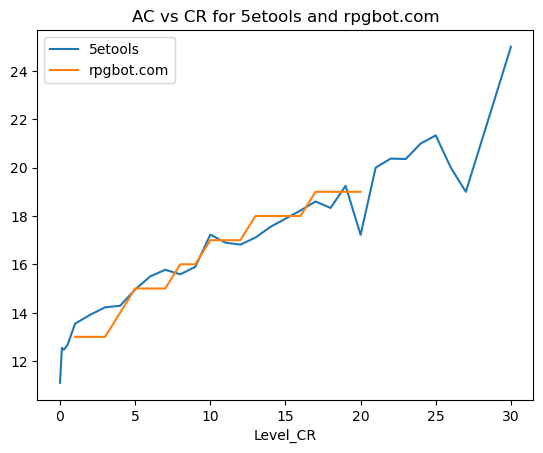

In [2]:
# plot out 5etools AC vs CR and rpgbot.com 'fundamental math' AC vs CR
# https://rpgbot.net/dnd5/characters/fundamental_math/
creatures.groupby('cr').ac_val.mean().plot(label='5etools')
dnd.fundamental_math().groupby('Level_CR').AC.mean().plot(label='rpgbot.com')
plt.legend()
plt.title('AC vs CR for 5etools and rpgbot.com')

In [3]:
# cale is a sorcerer with +5 to cha and +6 to proficiency bonus
spell_save_dc = 19
languages_cale_speaks = set(['C', 'U', 'AB', 'E'])
#save_dc = lambda c: 5+dnd.proficency_bonus(min(max(c['cr'],1), 20))+8

res = []
for c in creatures.iterrows():
    c = c[1]
    web = creature_condition_save(c, 'dex', spell_save_dc, 'restrianed')
    str_check = dnd.save_roll(save_modifier=(c['str']-10)/2, save_dc=spell_save_dc).mean()
    web_2_turns = web * str_check
    psychic_lance = creature_condition_save(c, 'int', spell_save_dc, 'none')
    hypnotic_pattern = creature_condition_save(c, 'wis', spell_save_dc, 'charmed')
    banishment = creature_condition_save(c, 'cha', spell_save_dc, 'banishment')
    polymorph = creature_condition_save(c, 'wis', spell_save_dc, 'polymorphed')
    web_wand = creature_condition_save(c, 'dex', 15, 'restrianed')
    str_check_wand = dnd.save_roll(save_modifier=(c['str']-10)/2, save_dc=15).mean()
    web_wand_2_turns = web * str_check_wand

    sc = lambda x: type(x) != float and len(x) > 0 and len(languages_cale_speaks.intersection(set(x))) > 0
    monster_shares_language_with_cale = sc(c['languageTags'])
    suggestion_tongues = creature_condition_save(c, 'wis', spell_save_dc, 'charmed')
    suggestion = monster_shares_language_with_cale and suggestion_tongues


    fireball = creature_damage_save(c, 'dex', spell_save_dc, Dice(10,6), 'fire')
    synaptic_static = creature_damage_save(c, 'int',  spell_save_dc, Dice(8,6), 'psychic')

    animate_objects = 10 * creature_damage_roll(c, 'bludgeoning', 8, Dice(1,4), 4).mean()

    # a two level dip in warlock for agonizing blast
    eldritch_blast = 4 * creature_damage_roll(c, 'force', 11, Dice(1,10) , 5+6)

    firebolt = creature_damage_roll(c, 'fire', 11, Dice(4,10))

    res.append({
        'web': web,
        'hypnotic_pattern': hypnotic_pattern,
        'banishment': banishment,
        'polymorph': polymorph,
        'web_wand': web_wand,
        'fireball': fireball,
        'synaptic_static': synaptic_static,
        'suggestion': suggestion,
        'suggestion_tongues': suggestion_tongues,
        'web_2_turns': web_2_turns,
        'web_wand_2_turns': web_wand_2_turns,
        'psychic_lance': psychic_lance,
        'telekenesis': str_check,
        'animate_objects': animate_objects,
        'eldritch_blast': eldritch_blast,
        'firebolt': firebolt
    })

save_columns = ['web', 'hypnotic_pattern', 'banishment', 'polymorph', 'web_wand', 'web_2_turns', 'web_wand_2_turns', 'suggestion', 'suggestion_tongues']
damage_columns= ['fireball', 'synaptic_static', 'animate_objects', 'eldritch_blast', 'firebolt']

creatures_cale = pd.concat([creatures, pd.DataFrame(res)], axis=1)

In [4]:
# plot out dagmage or save probabililtly for each spell on Ancient Dragons
creatures_cale[creatures_cale['name'].apply(lambda x: 'Ancient' in x and 'Dragon' in x)][['name'] + save_columns + damage_columns]

,name,web,hypnotic_pattern,banishment,polymorph,web_wand,web_2_turns,web_wand_2_turns,suggestion,suggestion_tongues,fireball,synaptic_static,animate_objects,eldritch_blast,firebolt
266,Ancient Cave Dragon,0.5017,0.4052,0.3548,0.3984,0.3053,0.224210,0.124873,0.3995,0.3995,15.7442,22.2788,30.936,41.1584,14.2673
267,Ancient Flame Dragon,0.4982,0.4430,0.3016,0.4492,0.2977,0.322784,0.225635,0.4519,0.4519,0.0000,19.5949,23.341,33.5228,0.0000
268,Ancient Mithral Dragon,0.2062,0.0000,0.3412,0.3456,0.0504,0.184075,0.146402,False,0.0000,5.0373,18.2879,30.326,20.3412,14.1550
269,Ancient Sea Dragon,0.5980,0.4464,0.3498,0.4468,0.3971,0.294874,0.181493,0.4419,0.4419,19.2490,19.4483,23.967,33.6980,12.1746
271,Ancient Void Dragon,0.6001,0.0000,0.3054,0.5020,0.3968,0.297170,0.177450,0.0,0.0000,19.1600,19.5964,24.065,33.9408,12.1120
272,Ancient Wind Dragon,0.4515,0.4517,0.3504,0.4477,0.2545,0.224260,0.135360,0.4457,0.4457,14.1030,19.7034,30.273,40.8104,14.2693
678,Ancient Black Dragon,0.4942,0.5028,0.4062,0.4989,0.3008,0.273737,0.172426,0.4859,0.4859,15.8286,21.0314,24.424,33.9912,12.3313
679,Ancient Blue Dragon,0.5966,0.4457,0.3459,0.4476,0.3978,0.294780,0.176415,0.4468,0.4468,19.3274,19.5804,23.253,34.1324,12.0365
680,Ancient Brass Dragon,0.6494,0.5470,0.4396,0.5465,0.4504,0.357495,0.221186,0.5479,0.5479,0.0000,21.1184,30.409,40.2112,0.0000
681,Ancient Bronze Dragon,0.6011,0.4501,0.3528,0.4567,0.3968,0.297905,0.178467,0.4515,0.4515,19.2817,19.4703,23.888,33.9636,11.9886


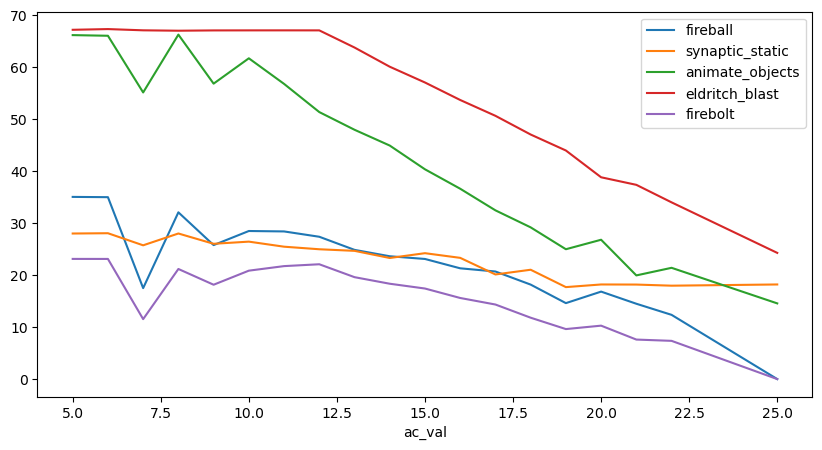

In [5]:
ax = creatures_cale.groupby('ac_val')[damage_columns].mean().plot(figsize=(10,5))

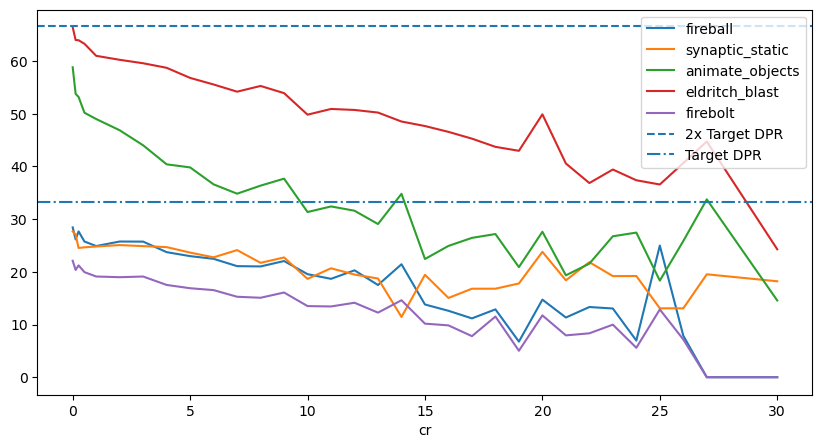

In [6]:
ax = creatures_cale.groupby('cr')[damage_columns].mean().plot(figsize=(10,5))
dpr = dnd.damage_targets().query("Level_CR==20")[['High_DPR', 'Target_DPR']].mean()
plt.axhline(dpr['High_DPR'], linestyle='--', label='2x Target DPR')
plt.axhline(dpr['Target_DPR'], linestyle='-.', label='Target DPR')
plt.legend()

Text(0.5, 1.0, 'Save DC vs CR for Cale on various spells')

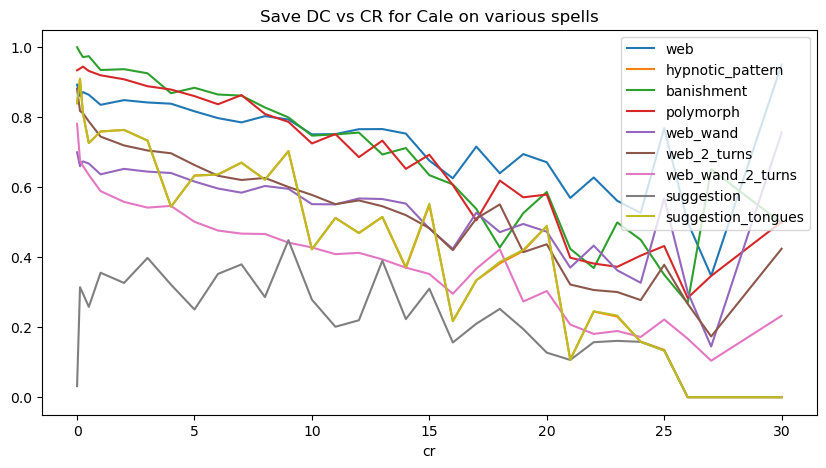

In [7]:
creatures_cale.groupby('cr')[save_columns].mean().plot(figsize=(10,5))
plt.title('Save DC vs CR for Cale on various spells')

In [8]:
creatures.legendary.isna

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
1234    [{'name': 'Charge', 'entries': ['Yeenoghu move...
1235                                                  NaN
1236    [{'name': 'Stomp', 'entries': ['The zaratan ma...
1237    [{'name': 'Immolating Gaze (Costs 2 Actions)',...
1238    [{'name': 'Attack', 'entries': ['Zuggtmoy make...
Name: legendary, Length: 1239, dtype: object

In [9]:
is_legendary = creatures.legendary.isna()

creatures[is_legendary & (creatures.cr<=15)].groupby(['type', 'cr']).save_wis.mean().unstack().T#.plot()#.plot()


type,aberration,beast,celestial,construct,dragon,elemental,fey,fiend,giant,humanoid,monstrosity,ooze,plant,undead
cr,,,,,,,,,,,,,,
0.000,0.000000,0.409091,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.333333,0.000000
0.125,0.000000,0.384615,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000
0.250,-0.666667,0.333333,NaN,-0.500000,1.000000,0.000000,1.400000,-2.0,NaN,0.750000,-1.000000,-1.500000,-1.666667,-1.000000
0.500,NaN,0.600000,NaN,0.333333,3.000000,0.000000,0.666667,NaN,NaN,-2.000000,0.444444,-2.000000,-0.666667,0.250000
1.000,1.000000,0.923077,NaN,-0.200000,1.400000,0.500000,1.200000,-2.0,0.000000,0.666667,1.000000,NaN,-0.666667,-0.200000
2.000,0.000000,0.727273,4.000000,-1.200000,1.500000,1.500000,0.500000,NaN,-2.000000,1.285714,1.266667,-2.000000,0.250000,0.375000
3.000,1.500000,1.000000,NaN,-0.666667,2.000000,0.000000,1.750000,2.0,-0.666667,1.400000,1.333333,2.000000,0.666667,1.888889
4.000,1.000000,1.000000,4.333333,0.000000,2.000000,NaN,1.600000,1.5,-0.400000,3.000000,1.400000,-0.666667,0.666667,1.916667
5.000,1.142857,0.166667,5.000000,1.166667,2.000000,0.000000,2.750000,1.5,0.000000,0.000000,1.705882,-0.666667,2.500000,2.692308


In [95]:
is_legendary = creatures.legendaryGroup_name.isna()

creatures[is_legendary & (creatures.cr<=15)].groupby(['type', 'cr']).save_int.mean().unstack().T

type,aberration,beast,celestial,construct,dragon,elemental,fey,fiend,giant,humanoid,monstrosity,ooze,plant,undead
cr,,,,,,,,,,,,,,
0.000,-3.000000,-3.954545,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.666667,-2.000000
0.125,-1.333333,-3.769231,NaN,-3.000000,NaN,NaN,-0.500000,NaN,NaN,NaN,-2.000000,NaN,-3.000000,-4.000000
0.250,0.000000,-3.857143,NaN,-2.000000,0.000000,0.000000,0.600000,2.0,NaN,1.250000,-3.000000,0.000000,-3.000000,-2.666667
0.500,NaN,-3.800000,NaN,-0.833333,3.000000,-1.000000,0.666667,NaN,NaN,0.000000,-2.222222,-4.000000,-2.000000,-2.250000
1.000,-3.000000,-3.461538,NaN,-1.600000,0.900000,-2.000000,0.200000,-3.0,-2.000000,0.333333,-1.333333,NaN,-2.000000,-2.000000
2.000,1.800000,-3.818182,0.000000,-2.800000,0.100000,-1.000000,-0.166667,NaN,-2.000000,0.428571,-2.400000,-4.000000,-0.500000,-1.250000
3.000,1.250000,-3.875000,NaN,-1.666667,1.750000,-2.000000,0.375000,-1.0,-0.666667,0.400000,-1.944444,0.000000,-2.000000,-1.000000
4.000,-1.666667,-4.000000,3.666667,-3.200000,0.500000,NaN,0.200000,1.5,-1.600000,1.000000,-2.200000,-3.333333,-2.666667,0.916667
5.000,-0.285714,-4.000000,0.500000,-1.833333,-2.500000,-1.333333,1.250000,4.0,-2.000000,3.000000,-1.352941,3.666667,1.750000,0.076923


<Axes: title={'center': 'Average Save DC for non-legendary creatures by type'}, xlabel='type'>

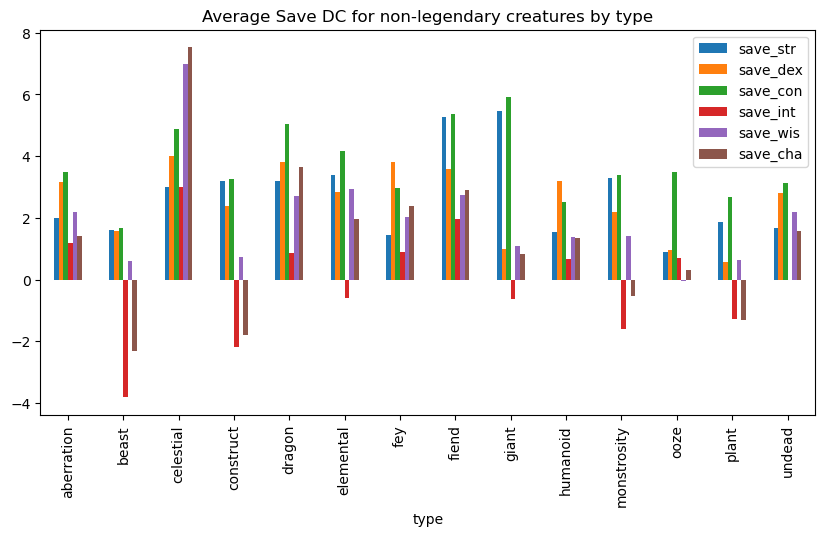

In [22]:
is_legendary = creatures.legendaryGroup_name.isna()
creatures[is_legendary].groupby(['type'])[['save_str', 'save_dex', 'save_con', 'save_int', 'save_wis', 'save_cha']].mean().plot(
    kind='bar', figsize=(10,5), title='Average Save DC for non-legendary creatures by type')

In [104]:
creatures[~is_legendary][['name', 'cr', 'type','conditionImmune_charmed']]

,name,cr,type,conditionImmune_charmed
18,Balhannoth,11.0,aberration,False
20,Baphomet,23.0,NaN,True
57,Demogorgon,26.0,NaN,True
72,Drow Matron Mother,20.0,NaN,True
86,Elder Brain,14.0,NaN,False
114,Graz'zt,24.0,NaN,True
129,Ki-rin,12.0,celestial,False
149,Merrenoloth,3.0,NaN,False
171,Orcus,26.0,NaN,True
206,Storm Giant Quintessent,16.0,giant,False


Text(0.5, 1.0, 'Hypnotic pattern looks pretty good except lots of creatures are immune to charm')

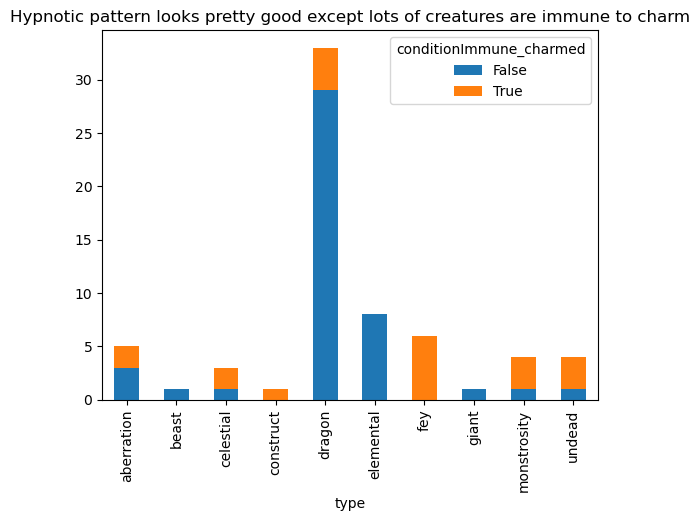

In [14]:
is_legendary = creatures.legendary.isna()

creatures[~is_legendary].groupby(['type','conditionImmune_charmed']).name.count().fillna(0).unstack().plot(kind='bar', stacked=True)
plt.title('Hypnotic pattern looks pretty good except lots of creatures are immune to charm')

Text(0.5, 1.0, 'Save DC vs CR for Cale on various spells for non-constructs, undead, and oozes')

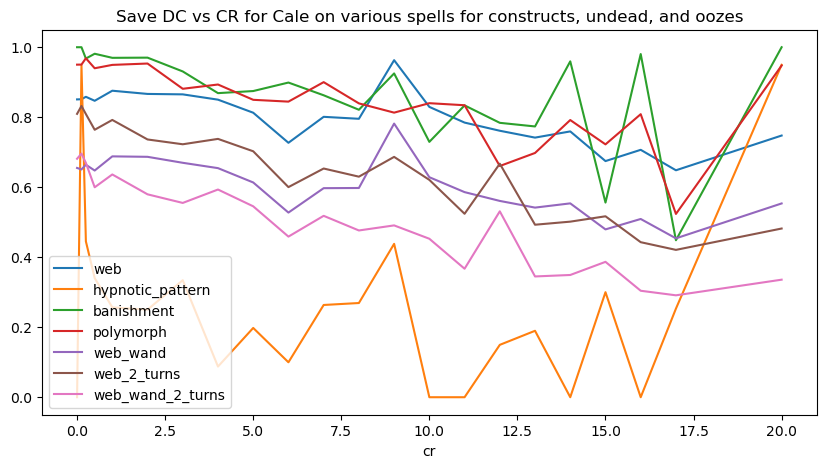

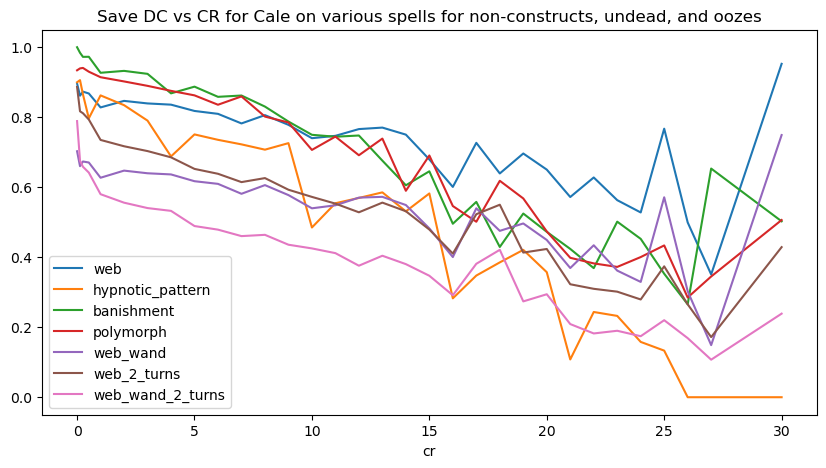

In [77]:
sel = creatures_cale.type.isin(['construct', 'undead', 'ooze'])
creatures_cale[sel].groupby('cr')[save_columns].mean().plot(figsize=(10,5))
plt.title('Save DC vs CR for Cale on various spells for constructs, undead, and oozes')

sel = ~sel
creatures_cale[sel].groupby('cr')[save_columns].mean().plot(figsize=(10,5))
plt.title('Save DC vs CR for Cale on various spells for non-constructs, undead, and oozes')

Text(0.5, 1.0, 'Spell damage by CR of 1 creature affected by spell\n adjusted for condition immunities and character level\n(eg. CR 10 monster facing CR 10 player)')

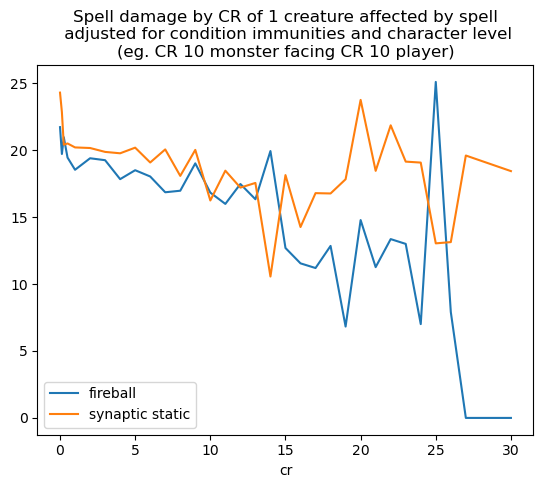

In [80]:
save_dc = lambda c: 5+dnd.proficency_bonus(min(max(c['cr'],1), 20))+8

res = []
for c in creatures.iterrows():
    c = c[1]
    r = creature_damage_save(c, 'dex', save_dc(c), Dice(10,6), 'fire')
    res.append(r)
pd.concat([creatures[['cr']], pd.Series(res, name='damage')], axis=1).groupby('cr').damage.mean().plot(label='fireball')



res = []
for c in creatures.iterrows():
    c = c[1]
    r = creature_damage_save(c, 'int',  save_dc(c), Dice(8,6), 'psychic')
    res.append(r)
pd.concat([creatures[['cr']], pd.Series(res, name='damage')], axis=1).groupby('cr').damage.mean().plot(label='synaptic static')

plt.legend()
plt.title('Spell damage by CR of 1 creature affected by spell\n adjusted for condition immunities and character level\n(eg. CR 10 monster facing CR 10 player)')

Text(0.5, 1.0, 'very few creatures are immune to restrained')

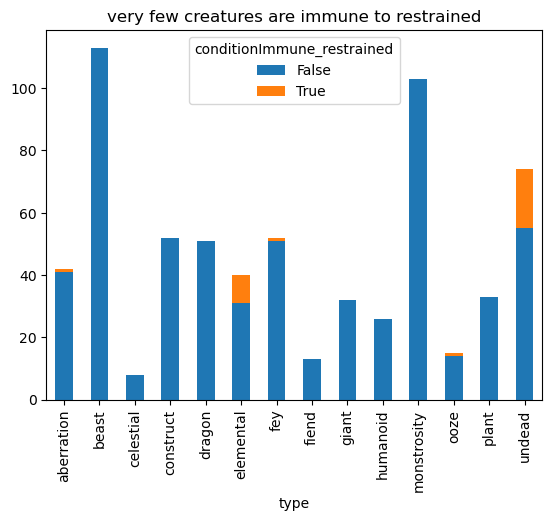

In [81]:
is_legendary = creatures.legendaryGroup_name.isna()

creatures[is_legendary & (creatures.cr<10)].groupby(['type','conditionImmune_restrained']).name.count().fillna(0).unstack().plot(kind='bar', stacked=True)
plt.title('very few creatures are immune to restrained')

Text(0.5, 1.0, 'Bludgeoning resistance by CR')

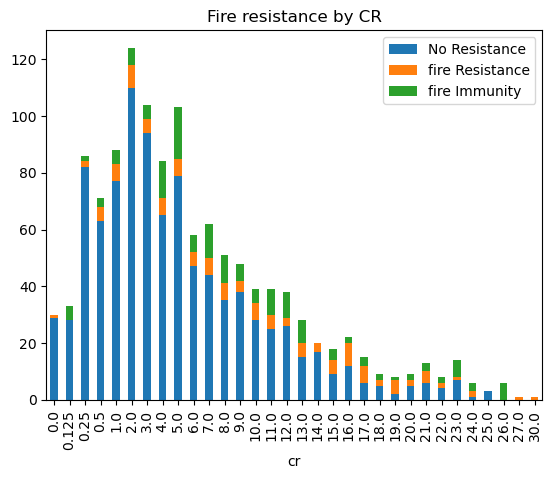

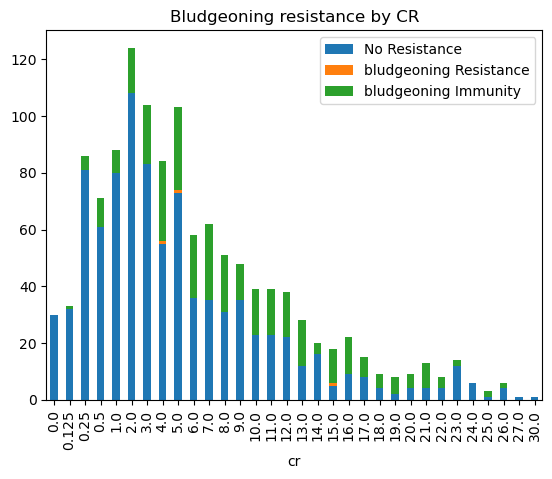

In [83]:


p_df = get_resistance_stats(creatures, 'fire')
plt.title('Fire resistance by CR')

p_df = get_resistance_stats(creatures, 'bludgeoning')
plt.title('Bludgeoning resistance by CR')

In [3]:
dnd.fundamental_math()

,Level_CR,Abl,Prof,Total,AC,Hit_Pcnt
0,1,3,2,5,13,65
1,2,3,2,5,13,65
2,3,3,2,5,13,65
3,4,4,2,6,14,65
4,5,4,3,7,15,65
5,6,4,3,7,15,65
6,7,4,3,7,15,65
7,8,5,3,8,16,65
8,9,5,4,9,16,70
9,10,5,4,9,17,65


In [84]:
# simulate damage per round with a paladin level 10 character with a +3 weapon and a 2 level dip to warlock
level = 10
charisma = 4
agonizing_blast = charisma
proficiency_bonus = dnd.proficency_bonus(level)
hex = Dice(1, 6)
hex_warrior = proficiency_bonus
weapon_damage = Dice(1, 10)
weapon_bonus_damage = 3 + charisma + hex_warrior
to_hit = 10

ac = dnd.get_AC(level)

smite = Dice(2, 8)


num_attacks = 3

adv = {'advantage':True, 'crit_on':20}

print('ts smite hw\t\t',
    dnd.roll_damage(ac, to_hit, weapon_damage, 
    bonus_damage=weapon_bonus_damage , **adv
    , crit_added_damage_dice=smite
).mean()*num_attacks)



ts smite hw		 49.5753


In [31]:
level = 10
charisma = 3
agonizing_blast = charisma
proficiency_bonus = dnd.proficency_bonus(level)
hex = Dice(1, 6)
hex_warrior = proficiency_bonus
weapon_damage = Dice(1, 10)
weapon_bonus_damage = 3 + charisma + charisma + hex_warrior
to_hit = 10
# get dc
ac = dnd.get_AC(level)

smite = Dice(2, 8)


num_attacks = 3

adv = {'advantage':True, 'crit_on':20}


print('ts smite hw\t\t',
    dnd.roll_damage(ac, to_hit, weapon_damage, 
    bonus_damage=weapon_bonus_damage , **adv
    , crit_added_damage_dice=smite
).mean()*num_attacks)


ts smite hw		 55.0791


In [48]:
num_melee_skeletons = 4
num_ranged_skeletons = 5*2*8

print('sele attack \t',
    (dnd.roll_damage(20, 4+3, Dice(1, 6), 
    bonus_damage=3+5 
).mean() + dnd.roll_damage(20, 0+3, Dice(1, 6), 
    bonus_damage=3+5 
).mean())*num_melee_skeletons)

print('sele single attack \t',
    dnd.roll_damage(20, 4, Dice(1, 6), 
    bonus_damage=3, crit_on=20
).mean()*num_ranged_skeletons)

sele attack 	 28.732
sele single attack 	 146.376


In [53]:
level = 20
charisma = 5
agonizing_blast = charisma
proficiency_bonus = dnd.proficency_bonus(level)
hex = Dice(1, 6)
hex_warrior = proficiency_bonus
weapon_damage = Dice(1, 10)
weapon_bonus_damage = 3 + charisma + charisma

smite = Dice(5, 8)
eldritch_smite = Dice(5, 8)


eldritch_blast = Dice(1, 10)

num_attacks = 3
num_eb = 4

adv = {'advantage':False, 'crit_on':20}
total_wepon_damange = weapon_damage + weapon_bonus_damage

print('eb \t\t\t', dnd.roll_damage(20, 13, eldritch_blast+hex, bonus_damage=agonizing_blast).mean()*num_eb)
#print('eb double up\t\t', dnd.roll_damage(20, 13, eldritch_blast, bonus_damage=agonizing_blast).mean()*num_eb*2)
print('eb cast hex warrior\t', dnd.roll_damage(20, 13, eldritch_blast, bonus_damage=agonizing_blast+hex_warrior, **adv).mean()*num_eb)
#print('eb double up after hw\t', dnd.roll_damage(20, 13, eldritch_blast, bonus_damage=agonizing_blast+hex_warrior, **adv).mean()*num_eb*2)

print('eb cast hex, hw\t\t', dnd.roll_damage(20, 13, eldritch_blast, bonus_damage=agonizing_blast+hex+hex_warrior, **adv).mean()*num_eb)
#print('eb loaded\t\t', dnd.roll_damage(20, 13, eldritch_blast, bonus_damage=agonizing_blast+hex+hex_warrior, **adv).mean()*num_eb*2)

print('eb cast hex\t\t', dnd.roll_damage(20, 13, eldritch_blast, bonus_damage=agonizing_blast+hex, **adv).mean()*num_eb)
#print('eb cast hex double up\t', dnd.roll_damage(20, 13, eldritch_blast, bonus_damage=agonizing_blast+hex, **adv).mean()*num_eb*2)
print()

print('ts smite hw\t\t',
    dnd.roll_damage(20, 14, Dice(1, 10)+smite, 
    bonus_damage=weapon_bonus_damage+hex_warrior, **adv
).mean()*num_attacks)

print('ts smite eld_smite\t\t',
    dnd.roll_damage(20, 14, Dice(1, 10)+smite, 
    bonus_damage=weapon_bonus_damage, **adv
).mean()*num_attacks+eldritch_smite.expectation())

print('ts smite eld_smite hw\t\t',
    dnd.roll_damage(20, 14, Dice(1, 10)+smite, 
    bonus_damage=weapon_bonus_damage+hex_warrior, **adv
).mean()*num_attacks+eldritch_smite.expectation())

print('ts smite hex\t\t',
    dnd.roll_damage(20, 14, Dice(1, 10)+smite, 
    bonus_damage=weapon_bonus_damage+hex, **adv
).mean()*num_attacks)


print('ts \t\t\t',
    dnd.roll_damage(20, 14, Dice(1, 10), 
    bonus_damage=weapon_bonus_damage, **adv
).mean()*num_attacks)

print('ts smite sustainable\t\t',
    dnd.roll_damage(20, 14, Dice(1, 10), 
    bonus_damage=weapon_bonus_damage+hex, 
    crit_added_damage_dice=smite+eldritch_smite,
    **adv
).mean()*num_attacks)

print('ts smite hex sustainable\t\t',
    dnd.roll_damage(20, 14, Dice(1, 10)+Dice(1,6), 
    bonus_damage=weapon_bonus_damage+hex, 
    crit_added_damage_dice=smite+eldritch_smite,
    **adv
).mean()*num_attacks)

print('eldritch_smite\t\t', eldritch_smite.expectation())

print('smite\t\t', smite.expectation())

print('sele magic stone \t',
    dnd.roll_damage(20, 2+5, Dice(1, 6), 
    bonus_damage=charisma , **adv
).mean())

print('sele single attack \t',
    dnd.roll_damage(20, 2+2+1, Dice(1, 6), 
    bonus_damage=3+5 , **adv
).mean())


eb 			 41.0
eb cast hex warrior	 47.3292


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [51]:
(Dice(1,6)+Dice(2,1)).expectation()

5.5

In [12]:
print('sele single attack \t',
    dnd.roll_damage(20, 2+2+1, Dice(1, 6), 
    bonus_damage=3 
).mean()*2*10)

sele single attack 	 41.536


In [177]:
def num_skele(level):
    return 4+(level-3)*2

num_skele(4) * 2 + num_skele(3)


16

In [119]:
dnd.spell_save_attack(5+5+Dice(1,4).expectation()+5,19, save_advantage=False).mean()

0.0999

In [268]:
weapon_bounus = 1
adv = {'advantage':False, 'crit_on':20}

dnd.roll_damage(
    20,
    4+weapon_bounus,
    Dice(1,6),
    bonus_damage=2+weapon_bounus+5,
    **adv
).mean()*5*2

36.255

In [277]:
weapon_bounus = 1
adv = {'advantage':False, 'crit_on':20}

dnd.roll_damage(
    20,
    4+weapon_bounus,
    Dice(1,6),
    bonus_damage=2+weapon_bounus+5,
    **adv
).mean()*5

18.5125

In [106]:

dnd.roll_damage(20, 4+3, 
    Dice(1,6) + Dice(1,6), 
    bonus_damage=2+3+10, **adv
).mean()*10

92.94399999999999

In [59]:
pally_attack[pally_attack>0].mean()

31.091598309719114

In [282]:
level = 20
charisma = 5
strength = 2
ability_score = charisma
melee_weapon = Dice(1,10) 
extra_dice = Dice(1,6) 
weapon_bonus = 3
bonus_damage = 2*charisma + weapon_bonus #+ dnd.proficency_bonus(level)
smite = Dice(4,8)+Dice(5,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 19
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon+extra_dice, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon+extra_dice, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4)+extra_dice, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save_attack(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2, save_advantage=True)
dex_saving_throw = dnd.spell_save_attack(-1 + ability_score, 10+level/2, save_advantage=True)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw failure:', wis_saving_throw.mean())
print('Dex saving throw failure:',dex_saving_throw.mean())

print('Chance to hit:', (pally_attack > 0).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.651
Wisdom saving throw failure: 0.3091
Dex saving throw failure: 0.659
Chance to hit: 0.8025
Damage for first round: 40.3118
Damage for second round: 57.9459


In [279]:
bonus_damage

19

In [49]:
charisma + charisma + weapon_bonus + dnd.proficency_bonus(level)

19

In [50]:
(melee_weapon+extra_dice).expectation()

9.0

In [52]:
np.percentile(pally_attack[pally_attack >0],50)

28.0

In [17]:
level = 8
charisma = 3
strength = 2
ability_score = charisma
melee_weapon = Dice(1,10) 
weapon_bonus = 3
bonus_damage = ability_score + weapon_bonus 
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)



chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Chance to hit:', (pally_attack2 > 0).mean())
print('Damege per  hit:', (pally_attack2).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.5491
Wisdom saving throw success: 0.2997
Dex saving throw success: 0.4532
Chance to hit: 0.7051
Damege per  hit: 8.8356
Damage for first round: 17.6002
Damage for second round: 24.0831


In [21]:
level = 9
charisma = 3
strength = 2
ability_score = strength
melee_weapon = Dice(1,10) + Dice(1,6)
weapon_bonus = 3
bonus_damage = ability_score + charisma + weapon_bonus 
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 19
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + charisma + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + charisma, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Chance to hit:', (pally_attack2 > 0).mean())
print('Damege per  hit:', (pally_attack2).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.5975
Wisdom saving throw success: 0.6047
Dex saving throw success: 0.41
Chance to hit: 0.7041
Damege per  hit: 12.8745
Damage for first round: 25.7047
Damage for second round: 33.6623


In [22]:
level = 10
charisma = 3
strength = 2
ability_score = charisma
melee_weapon = Dice(1,10) + Dice(1,6)
weapon_bonus = 3
bonus_damage = ability_score + charisma + weapon_bonus 
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + charisma + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + charisma, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Chance to hit:', (pally_attack2 > 0).mean())
print('Damege per  hit:', (pally_attack2).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.5929
Wisdom saving throw success: 0.6051
Dex saving throw success: 0.4003
Chance to hit: 0.6842
Damege per  hit: 13.1678
Damage for first round: 26.5701
Damage for second round: 35.1545


In [23]:
Dice(1,20).roll()+4

array([15])

In [24]:
level = 20
charisma = 5
strength = 3
ability_score = charisma 
melee_weapon = Dice(1,10) + Dice(1,8) + Dice(4,8)
weapon_bonus = 3
bonus_damage = ability_score + charisma + weapon_bonus + 6
smite = None
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':True, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + charisma + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + charisma, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:', dex_saving_throw.mean())

print('Chance to hit:', (pally_attack2 > 0).mean())
print('Damege per  hit:', (pally_attack2).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.7035
Wisdom saving throw success: 0.5517
Dex saving throw success: 0.2378
Chance to hit: 0.9621
Damege per  hit: 47.9647
Damage for first round: 95.9405
Damage for second round: 116.8443


In [25]:
(dnd.roll_damage(18, 12, Dice(1,2), disadvantage=True) > 0).mean()

0.5629

In [26]:
dnd.spell_save(8, 10+level/2).mean()

0.4495

In [257]:
(dnd.roll_damage(22, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)>0).mean()

0.8821

Chace to  hit 0.5442
Chace to be hit 0.7058
Damage per round: 64.0574


<Axes: >

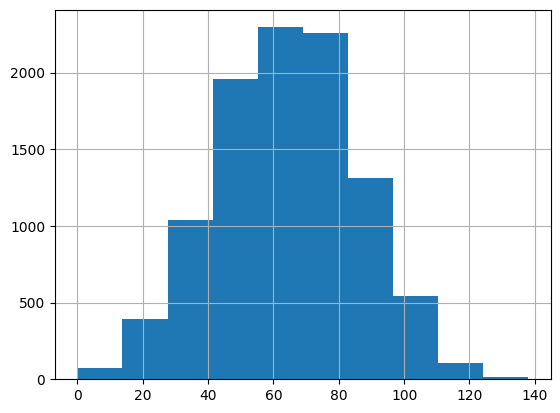

In [221]:
# skeletons 2 short swords
num_skeletons = 4
level = 12
charisma = 5
dex = 2
ability_score = None 
melee_weapon = Dice(1,6) + Dice(1,4)
weapon_bonus = 2
bonus_damage = None 
to_hit = 2 + dex + weapon_bonus
adv = {'advantage':False, 'crit_on':20}
enemy_ac = 16 #dnd.get_AC(level)

AC = 16
chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()


attacks = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=dex + charisma + weapon_bonus, **adv)
print('Chace to  hit', (attacks>0).mean())
attacks += dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage= charisma + weapon_bonus, **adv)
for _ in range(num_skeletons -1):
    attacks += dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=dex + charisma + weapon_bonus, **adv)
    attacks += dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage= charisma + weapon_bonus, **adv)

print('Chace to be hit', chance_to_be_hit)
print('Damage per round:', (attacks).mean())

pd.Series(attacks).hist()

Chace to be hit 0.8032
Damage per round: 112.1627


<Axes: >

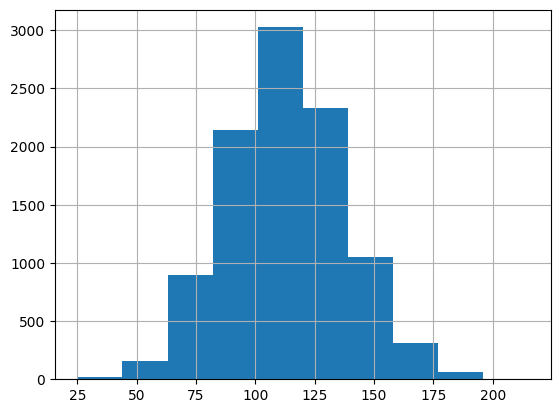

In [207]:
# skeletons bows
num_skeletons = 28
level = 20
charisma = 3
dex = 2
ability_score = None 
melee_weapon = Dice(1,6)
weapon_bonus = 0
bonus_damage = None 
to_hit = 7
adv = {'advantage':False, 'crit_on':20}
enemy_ac = dnd.get_AC(level)

AC = 16
chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()


attacks = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=dex + charisma+ weapon_bonus, **adv)


for _ in range(num_skeletons -1):
    attacks += dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=dex + charisma+ weapon_bonus, **adv)

print('Chace to be hit', chance_to_be_hit)
print('Damage per round:', (attacks).mean())

pd.Series(attacks).hist()

Chace to be hit 0.6949
Damage per round: 7.0573


<Axes: >

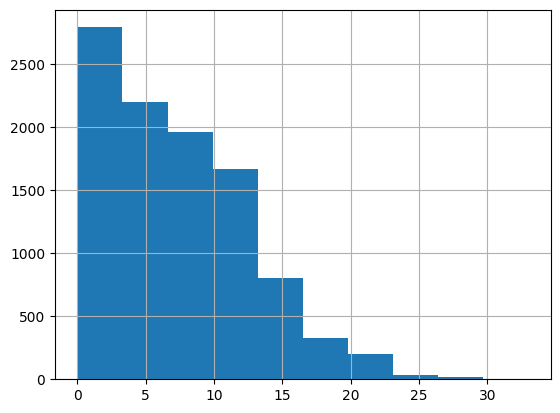

In [193]:
# skeletons bows
num_skeletons = 3
level = 12
charisma = 4
dex = 2
ability_score = None 
melee_weapon = Dice(1,6)
weapon_bonus = 0
bonus_damage = None 
to_hit = 2 + dex + weapon_bonus
adv = {'advantage':False, 'crit_on':20}
enemy_ac = dnd.get_AC(level)

AC = 16
chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()


attacks = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=dex + weapon_bonus, **adv)


for _ in range(num_skeletons -1):
    attacks += dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=dex + weapon_bonus, **adv)

print('Chace to be hit', chance_to_be_hit)
print('Damage per round:', (attacks).mean())

pd.Series(attacks).hist()

In [143]:
level = 12
charisma = 4
strength = 4
ability_score = strength
melee_weapon = Dice(1,10) + Dice(1,8)
weapon_bonus = 3
bonus_damage = ability_score + charisma + weapon_bonus 
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + charisma + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + charisma, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Chance to hit:', (pally_attack2 > 0).mean())
print('Damege per  hit:', (pally_attack2).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.357
Wisdom saving throw success: 0.5954
Dex saving throw success: 0.3986
Chance to hit: 0.7438
Damege per  hit: 16.6003
Damage for first round: 33.1268
Damage for second round: 43.8057


In [130]:
level = 12
charisma = 4
strength = 4
ability_score = charisma
melee_weapon = Dice(1,10) + Dice(1,8)
weapon_bonus = 3
bonus_damage = ability_score + charisma + weapon_bonus 
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + charisma + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + charisma, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Chance to hit:', (pally_attack2 > 0).mean())
print('Damege per  hit:', (pally_attack2).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.5979
Wisdom saving throw success: 0.5988
Dex saving throw success: 0.4072
Chance to hit: 0.7462
Damege per  hit: 16.6391
Damage for first round: 33.3151
Damage for second round: 43.9656


In [127]:
level = 11
charisma = 4
strength = 3
ability_score = strength
melee_weapon = Dice(1,10) + Dice(1,8) 
weapon_bonus = 3
bonus_damage = ability_score + charisma + weapon_bonus 
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus 
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + charisma + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + charisma, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Chance to hit:', (pally_attack2 > 0).mean())
print('Damege per  hit:', (pally_attack2).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.5895
Wisdom saving throw success: 0.5897
Dex saving throw success: 0.3966
Chance to hit: 0.7035
Damege per  hit: 15.0206
Damage for first round: 29.8117
Damage for second round: 39.1762


In [5]:
level = 6
ability_score = 2
melee_weapon = Dice(1,6)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score

pally_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite)
pally_attack2 = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage, crit_added_damage_dice=smite)
pam_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(1,4), bonus_damage, crit_added_damage_dice=smite)

lvl_6_pally = pally_attack + pally_attack2 + pam_attack

wis_saving_throw = dnd.spell_save(-1 + 3 + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + 3, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2)) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Damage per round:', lvl_6_pally.mean())

Chace to be hit 0.3409
Wisdom saving throw success: 0.6605
Dex saving throw success: 0.49
Damage per round: 10.2391


In [6]:
level = 7
ability_score = 2
melee_weapon = Dice(1,6)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score+3

pally_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite)
pally_attack2 = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage, crit_added_damage_dice=smite)
pam_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(1,4), bonus_damage, crit_added_damage_dice=smite)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2)) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.3526
Wisdom saving throw success: 0.5502
Dex saving throw success: 0.3988
Damage for first round: 10.5613
Damage for second round: 15.2529


In [145]:
dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,10)+Dice(1,6), bonus_damage=10).mean()

19.0823

In [7]:
level = 7
ability_score = 3
melee_weapon = Dice(2,6)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score
adv = {}#{'advantage':True, 'crit_on':19}

pally_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,10)+Dice(1,6))
magic_stone = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,6), bonus_damage=ability_score*2)
pally_attack2 = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(1,4), bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2)) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw:',dex_saving_throw.mean())

print('Edritch blast round:', eldrith_blast.mean())
print('Magic stone round:', magic_stone.mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.3484
Wisdom saving throw success: 0.5964
Dex saving throw: 0.4451
Edritch blast round: 9.2882
Magic stone round: 8.2107
Damage for first round: 13.6156
Damage for second round: 17.5467


In [8]:
level = 8
ability_score = 3
melee_weapon = Dice(2,6)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score*2
adv = {}#{'advantage':True, 'crit_on':19}

pally_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,10)+Dice(1,6))
magic_stone = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,6), bonus_damage=ability_score*2)
pally_attack2 = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(1,4), bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2)) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Magic stone round:', magic_stone.mean())
print('Edritch blast round:', eldrith_blast.mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.3984
Wisdom saving throw success: 0.5916
Dex saving throw success: 0.4553
Magic stone round: 7.4949
Edritch blast round: 8.7422
Damage for first round: 15.7173
Damage for second round: 20.9847


In [9]:
level = 9
ability_score = 4
melee_weapon = Dice(2,6)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score*2
adv = {}#{'advantage':True, 'crit_on':19}

pally_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,10)+Dice(2,6))
pally_attack2 = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(1,4), bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2)) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Edritch blast round:', eldrith_blast.mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.4469
Wisdom saving throw success: 0.6561
Dex saving throw success: 0.4534
Edritch blast round: 12.6362
Damage for first round: 21.1131
Damage for second round: 28.4732


In [10]:
level = 10
ability_score = 4
melee_weapon = Dice(2,6)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score*2
adv = {}#{'advantage':True, 'crit_on':19}

pally_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,10)+Dice(2,6), bonus_damage=ability_score*2) 
magic_stone = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,6)+Dice(2,6), bonus_damage=ability_score*2)
pally_attack2 = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(1,4), bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2)) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Edritch blast round:', eldrith_blast.mean())
print('Magic stone round:', magic_stone.mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.4517
Wisdom saving throw success: 0.6502
Dex saving throw success: 0.454
Edritch blast round: 16.4005
Magic stone round: 13.9873
Damage for first round: 19.6675
Damage for second round: 26.4957


In [ ]:
level = 14
ability_score = 5
melee_weapon = Dice(1,6) + Dice(1,8)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score
bonus_damage = ability_score * 2
adv = {'advantage':False, 'crit_on':19}
enemy_ac = dnd.get_AC(level)
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10)+Dice(3,6), bonus_damage=ability_score*3) 
normal_skele = dnd.roll_damage(enemy_ac, 2, Dice(3,6), bonus_damage=2) 

magic_stone = dnd.roll_damage(enemy_ac, to_hit, Dice(3,6), bonus_damage=ability_score*3)
magic_stone_eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10), bonus_damage=ability_score*3) 

pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Edritch blast round:', eldrith_blast.mean())
print('Magic stone round:', (magic_stone_eldrith_blast+magic_stone).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

In [33]:
level = 14
ability_score = 5
melee_weapon = Dice(1,6)+Dice(1,8)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score*2
adv = {'advantage':False, 'crit_on':19}
enemy_ac = dnd.get_AC(level)
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10)+Dice(3,6), bonus_damage=ability_score*3) 
normal_skele = dnd.roll_damage(enemy_ac, 2, Dice(3,6), bonus_damage=2) 

magic_stone = dnd.roll_damage(enemy_ac, to_hit, Dice(3,6), bonus_damage=ability_score*3)
magic_stone_eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10), bonus_damage=ability_score*3) 

pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Edritch blast round:', eldrith_blast.mean())
print('Magic stone round:', (magic_stone_eldrith_blast+magic_stone).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.4907
Wisdom saving throw success: 0.6573
Dex saving throw success: 0.3969
Edritch blast round: 28.882
Magic stone round: 38.2805
Damage for first round: 26.8412
Damage for second round: 36.2194


In [34]:
level = 14
ability_score = 5
melee_weapon = Dice(1,6)+Dice(1,8)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score*2
adv = {'advantage':True, 'crit_on':19}
enemy_ac = dnd.get_AC(level)
attackers_disadvantage = True

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10)+Dice(3,6), bonus_damage=ability_score*3) 
normal_skele = dnd.roll_damage(enemy_ac, 2, Dice(3,6), bonus_damage=2) 

magic_stone = dnd.roll_damage(enemy_ac, to_hit, Dice(3,6), bonus_damage=ability_score*3)
magic_stone_eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10), bonus_damage=ability_score*3) 

pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Edritch blast round:', eldrith_blast.mean())
print('Magic stone round:', (magic_stone_eldrith_blast+magic_stone).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.2512
Wisdom saving throw success: 0.6517
Dex saving throw success: 0.3972
Edritch blast round: 28.3892
Magic stone round: 38.684
Damage for first round: 38.2526
Damage for second round: 51.295


In [91]:
damage = 50.0 
level = 15
con = 8 
dex = 4
chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2), disadvantage=True) > 0).mean()

spell_save = dnd.advantage_roll(advantage=False, disadvantage=False, num_simulations=4000)

fail_spell_save = (19 > (dex + spell_save)).mean()

con_save = dnd.advantage_roll(advantage=False, disadvantage=False, num_simulations=4000)
con_DC = max(10.0, damage/2.0)
fail_con_check = (con_DC > (con_save+con)).mean() 

print('probablity to lose concentration (attack)', chance_to_be_hit * fail_con_check)
print('probablity to lose concentration (dex save)', fail_spell_save * fail_con_check)

probablity to lose concentration (attack) 0.20191420000000004
probablity to lose concentration (dex save) 0.3551165


In [92]:
level = 20
ability_score = 5
melee_weapon = Dice(1,6)+Dice(1,8)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score*2
adv = {'advantage':False, 'crit_on':19}
enemy_ac = dnd.get_AC(level)
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10)+Dice(3,6), bonus_damage=ability_score*3) 
normal_skele = dnd.roll_damage(enemy_ac, 2, Dice(3,6), bonus_damage=2) 

magic_stone = dnd.roll_damage(enemy_ac, to_hit, Dice(3,6), bonus_damage=ability_score*3)
magic_stone_eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10), bonus_damage=ability_score*3) 

pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Edritch blast round:', eldrith_blast.mean())
print('Magic stone round:', (magic_stone_eldrith_blast+magic_stone).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.5423
Wisdom saving throw success: 0.5462
Dex saving throw success: 0.2522
Edritch blast round: 28.2727
Magic stone round: 38.1506
Damage for first round: 26.997
Damage for second round: 36.2165
